1\. **Kernel Density Estimate**

Produrre una KDE per una data distribuzione (a mano, non usando seaborn!):

* Riempire un array numpy, x, di len(N) (con N=O(100)) con una variabile normalmente distribuita, con una media e una deviazione standard date.
* Riempire un istogramma in pyplot curando adeguatamente l'estetica
   * utilizzare un numero significativo di bins
   * impostare un'etichetta adeguata per l'asse y
   * Impostare il valore corretto delle etichette dei tick principali dell'asse y (ad esempio, si desidera visualizzare solo etichette intere).
   * visualizzare gli istogrammi come punti di dati con errori (l'errore è l'incertezza di Poisson)
* Per ogni elemento di x, creare una gaussiana con la media corrispondente al valore dell'elemento e std come parametro che può essere regolato. Il valore predefinito di std dovrebbe essere:
$$ 1,06 * x.std() * x.size ^{-\frac{1}{5.}} $$
Si può usare la funzione scipy `stats.norm()` per questo.
* In un grafico separato (da affiancare all'istogramma originale), tracciare tutte le funzioni gaussiane così ottenute
* Somma (con np.sum()) tutte le funzioni gaussiane e normalizza il risultato in modo che l'integrale corrisponda all'integrale dell'istogramma originale. Per questo si può usare il metodo `scipy.integrate.trapz()`.

2\. **Color-coded scatter plot**

Produrre un grafico di dispersione da un insieme di dati con due categorie

* Scrivere una funzione che generi un insieme di dati 2D di 2 categorie. Ogni categoria dovrebbe distribuirsi come una gaussiana 2D con una media e una std date (chiaramente è meglio avere valori diversi di media...).
* Visualizzare il set di dati in un grafico a dispersione contrassegnando le due categorie con colori diversi.

Un esempio è riportato di seguito

Si può cercare di rendere la procedura più generale consentendo un determinato numero $n\ge 2$ di categorie

Scrivere una funzione che generi un insieme di dati 2D di 2 categorie. Ogni categoria dovrebbe distribuirsi come una gaussiana 2D con una media e una std date (chiaramente è meglio avere valori diversi di media...).

Visualizzare il set di dati in un grafico a dispersione, contrassegnando le due categorie con colori diversi.

Si può cercare di rendere la procedura più generale ammettendo un determinato numero 𝑛≥2 di categorie

3\. **Profile plot (OPZIONALE)** 

Produrre un grafico del profilo da un grafico a dispersione.
* Scaricare il seguente set di dati e caricarlo come dataframe pandas:
```bash
!wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Si noti che è necessario utilizzare la funzione `np.load()` per caricare il file come array numpy, chiamare il metodo `.item()` e quindi passarlo al costruttore `pd.DataFrame()`.
* Ispezionare il set di dati, per trovare due variabili (caratteristiche).
* Pulire il campione selezionando le voci (righe) con la variabile "residuals" in valore assoluto inferiore a 2.
* Eseguire una regressione lineare dei "residui" rispetto alle "distanze" utilizzando `scipy.stats.linregress()`. 
* tracciare un grafico congiunto di seaborn dei "residui" rispetto alle "distanze", con seaborn che esegue una regressione lineare. Il risultato della regressione deve essere visualizzato sul grafico.

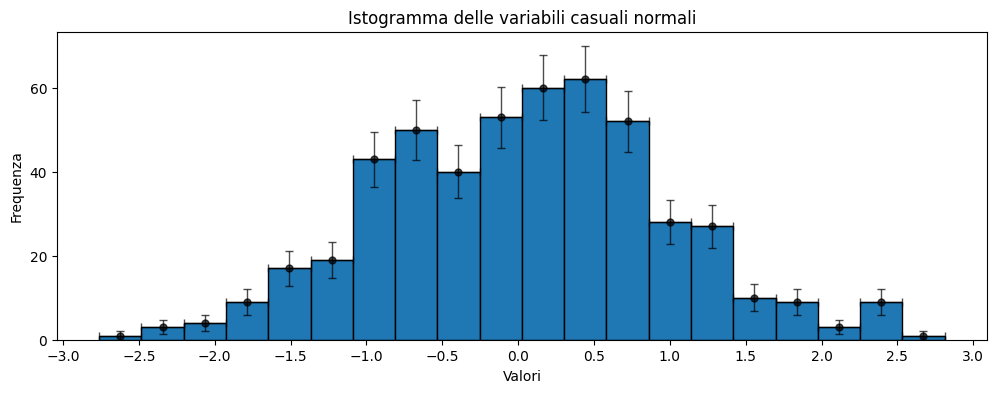

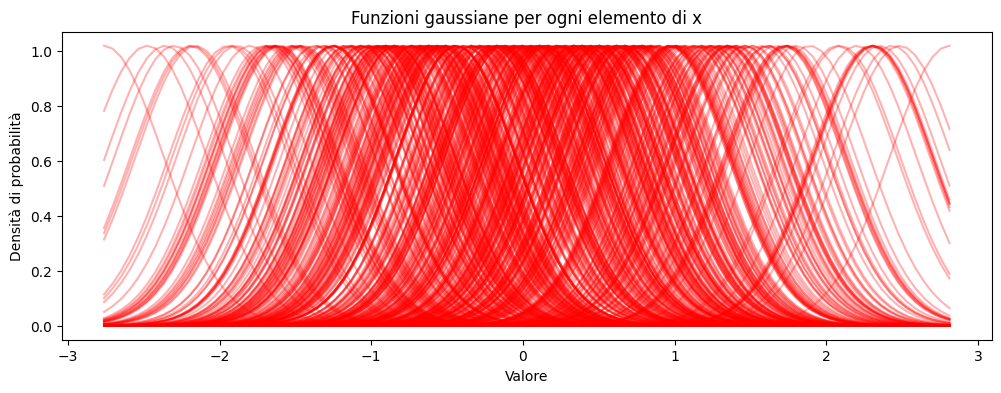

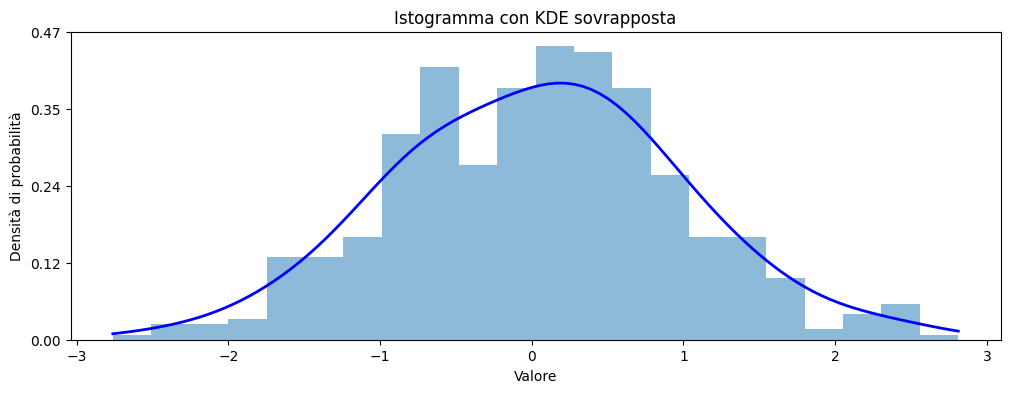

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate

plt.rcParams["figure.figsize"] = (12,4)

# Definiamo i parametri della distribuzione normale
mu = 0  # media
sigma = 1  # deviazione standard

# Generiamo un array di numeri casuali dalla distribuzione normale
N = 500
x = np.random.normal(mu, sigma, N)

# Istogramma con un numero significativo di bins
n_bins = int(np.sqrt(N))

counts, bin_edges = np.histogram(x, bins=20)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
bin_widths = bin_edges[1:] - bin_edges[:-1]
bin_uncertainties = np.sqrt(counts)


plt.errorbar(bin_centers, counts, yerr=bin_uncertainties, xerr=bin_widths/2, fmt='o', markersize=5, capsize=3, elinewidth=1, alpha=0.7, color='black')
#plt.hist(x, bins=10, density=True, alpha=0.7)
plt.xlabel('Valori')
plt.ylabel('Frequenza')
plt.title('Istogramma delle variabili casuali normali')
plt.locator_params(axis='y', nbins=4)
plt.locator_params(axis='x', nbins=13)
plt.rcParams["figure.figsize"] = (12,4)
plt.bar(bin_centers, counts, bin_widths, edgecolor = "black") 
plt.show()

# Tracciamo le funzioni gaussiane per ogni elemento di x
std = 1.06 * x.std() * x.size ** (-0.15)  # calcoliamo la deviazione standard per ogni gaussiana
gaussians = []
for xi in x:
    gaussians.append(stats.norm(xi, std))

# Grafico separato con tutte le funzioni gaussiane
x_range = np.linspace(x.min(), x.max(), 100)


# Sommiamo tutte le funzioni gaussiane e normalizziamo il risultato in modo che l'integrale corrisponda all'istogramma originale
pdf_sum = np.zeros_like(x_range)
for g in gaussians:
    pdf_sum += g.pdf(x_range)
pdf_sum /= integrate.trapz(pdf_sum, x_range)

# Sovrapponiamo la KDE all'istogramma originale

# Grafico separato con tutte le funzioni gaussiane
fig2, ax2 = plt.subplots()
ax2.set_xlabel('Valore')
ax2.set_ylabel('Densità di probabilità')
ax2.set_title('Funzioni gaussiane per ogni elemento di x')
x_range = np.linspace(x.min(), x.max(), 100)
for g in gaussians:
    ax2.plot(x_range, g.pdf(x_range), color='red', alpha=0.3)

# Sommiamo tutte le funzioni gaussiane e normalizziamo il risultato in modo che l'integrale corrisponda all'istogramma originale
pdf_sum = np.zeros_like(x_range)
for g in gaussians:
    pdf_sum += g.pdf(x_range)
pdf_sum /= integrate.trapz(pdf_sum, x_range)

# Sovrapponiamo la KDE all'istogramma originale
fig, ax = plt.subplots()
ax.hist(x, bins=n_bins, density=True, alpha=0.5)
ax.plot(x_range, pdf_sum, color='blue', lw=2)
ax.set_xlabel('Valore')
ax.set_ylabel('Densità di probabilità')
ax.set_title('Istogramma con KDE sovrapposta')

# Impostiamo il valore corretto delle etichette dei tick principali dell'asse y
y_ticks = np.linspace(0, ax.get_ylim()[1], 5)
y_tick_labels = ['{:.2f}'.format(y) for y in y_ticks]
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_tick_labels)

plt.show()


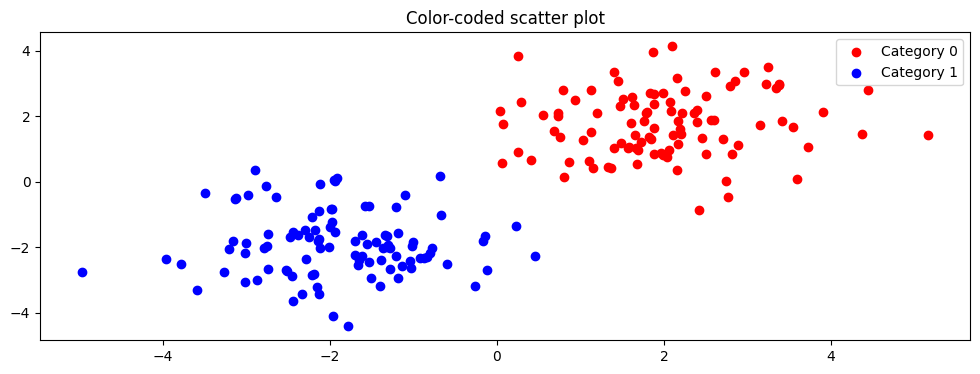

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(num_samples, means, stds):
    num_categories = len(means)
    assert num_categories == len(stds)
    data = []
    for i in range(num_categories):
        mean = means[i]
        std = stds[i]
        samples = np.random.multivariate_normal(mean, std, num_samples)
        category = np.ones(num_samples, dtype=int) * i
        data.append((samples, category))
    return data

# Esempio con due categorie
num_samples = 100
means = [(2, 2), (-2, -2)]
stds = [np.array([[1, 0], [0, 1]]), np.array([[1, 0], [0, 1]])]

data = generate_data(num_samples, means, stds)

colors = ['red', 'blue']
for i in range(len(data)):
    samples, category = data[i]
    plt.scatter(samples[:,0], samples[:,1], c=colors[i], label='Category {}'.format(i))
plt.legend()
plt.title("Color-coded scatter plot")
plt.rcParams["figure.figsize"] = (12,4) 

plt.show()

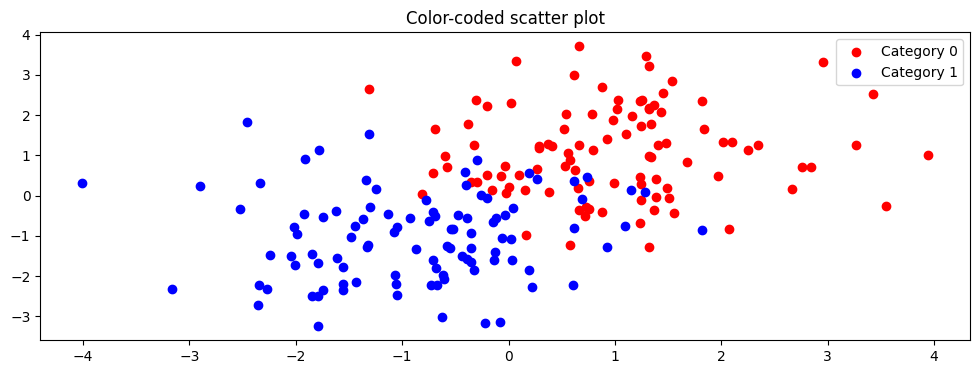

In [18]:
def generate_data(num_samples, num_categories, means, stds):
    assert num_categories == len(means)
    assert num_categories == len(stds)
    data = []
    for i in range(num_categories):
        samples = np.random.multivariate_normal(means[i], stds[i], num_samples)
        category = np.ones(num_samples, dtype=int) * i
        data.append((samples, category))
    return data

# Esempio con due categorie
num_samples = 100
num_categories = 2
means = [np.array([1, 1]), np.array([-1, -1])]
stds = [np.array([[1, 0], [0, 1]]), np.array([[1, 0], [0, 1]])]

data = generate_data(num_samples, num_categories, means, stds)

colors = ['red', 'blue']
for i in range(num_categories):
    samples, category = data[i]
    plt.scatter(samples[:,0], samples[:,1], c=colors[i], label='Category {}'.format(i))
plt.legend()
plt.rcParams["figure.figsize"] = (12,4) 
plt.title("Color-coded scatter plot")
plt.show()

Coefficiente di regressione:  0.0032597701220305835


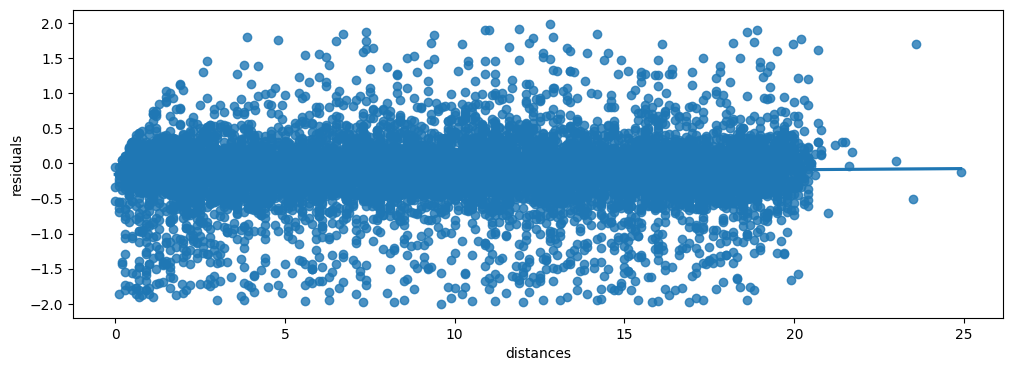

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Caricare i dati come array numpy e convertirli in dataframe pandas
data = np.load('residuals_261.npy', allow_pickle=True).item()
df = pd.DataFrame(data)

# Selezionare le voci (righe) con il valore assoluto del residuals inferiore a 2
df_clean = df[np.abs(df['residuals']) < 2]

# Eseguire una regressione lineare dei residui rispetto alle distanze
slope, intercept, r_value, p_value, std_err = linregress(df_clean['distances'], df_clean['residuals'])
print('Coefficiente di regressione: ', slope)

# Tracciare il grafico a dispersione congiunto con la regressione lineare
sns.regplot(x="distances", y="residuals", data=df_clean)

plt.show()